## Ingestion

First, import the needed python libraries and then read in the water temperature data from a csv file

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
raw_temps = pd.read_csv("raw_data/water_temps_kok002.csv",header=2)
dt = pd.to_datetime(raw_temps['Timestamp (UTC-08:00)'])
temps = pd.DataFrame({'Timestamp':dt,'Temperature':raw_temps['Value (Celsius)']})

## Process

The data is hourly, with the odd gap. Convert to a monthly average

In [3]:
temps['year'] = temps['Timestamp'].apply(lambda x: x.year)
temps['month'] = temps['Timestamp'].apply(lambda x: x.month)

In [4]:
def build_averages(*groupCols):
    mean_temp = temps.groupby(groupCols).mean()['Temperature']
    var_temp = temps.groupby(groupCols).var()['Temperature']
    return pd.DataFrame({'Mean':mean_temp,'Variance':var_temp}).reset_index()

In [5]:
per_month = build_averages('year','month')
per_month['start_date'] = per_month.apply(lambda x: datetime(year=int(x['year']),month=int(x['month']),day=1),axis=1)

## Present

We can now show off the results. For now, just a simple plot

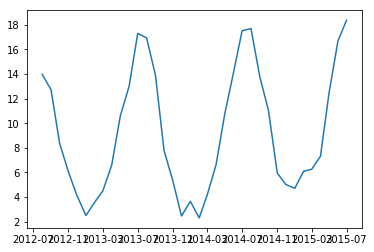

In [6]:
plt.plot(per_month['start_date'],per_month['Mean'])

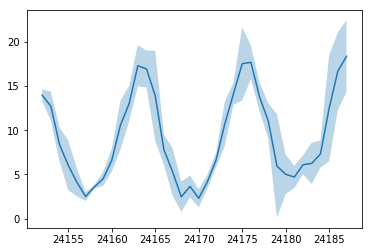

In [7]:
per_month['sd_num'] = per_month.apply(lambda x: x['year']*12 + x['month'],axis=1)
plt.plot(per_month['sd_num'],per_month['Mean'])
per_month['up'] = per_month['Mean'] + per_month['Variance']
per_month['dn'] = per_month['Mean'] - per_month['Variance']
plt.fill_between(per_month['sd_num'], per_month['up'], per_month['dn'], alpha=0.3)